# SNR ~ likelihood dependence
Fig 16

In [1]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

from scipy.special import ive as Ive
from scipy.special import iv as Iv
def logi0(x):
    return np.log(Ive(0,x))+np.abs(x)
def error(x):
    return (np.percentile(x,84)-np.percentile(x,16))/2

from glob import glob

file_index = glob("../uniew_injection/*1000*/*_newlikelihood*.csv")
file_index = [file for file in file_index if "0.000" not in file]
file_index = [file for file in file_index if "qfactor" not in file]
file_index.sort()
file_index

['../uniew_injection/npoints=1000_duration=12_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=1_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=1_n10_4parameter_HWP/4parameter_echoamplitude=0.140_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=24_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=2_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=3_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=4_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=52_4parameter_HWP/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_duration=52_n10_4parameter_HWP/4paramet

In [2]:
spacing_q_index = [25,50]
file_index_q = glob("../uniew_injection/*1000*/*_newlikelihood*.csv")
file_index_q = [file for file in file_index_q if "qfactor" in file]
file_index_q

['../uniew_injection/npoints=1000_qfactor=100_priorscaled_4parameter_HWP_new/4parameter_echoamplitude=0.077_newlikelihood_all.csv',
 '../uniew_injection/npoints=1000_qfactor=200_priorscaled_Tfactor100_4parameter_HWP_new/4parameter_echoamplitude=0.054_newlikelihood_all.csv']

In [3]:
datanew = pd.read_csv("dataMoreAmplitude/data_trend_new.csv")

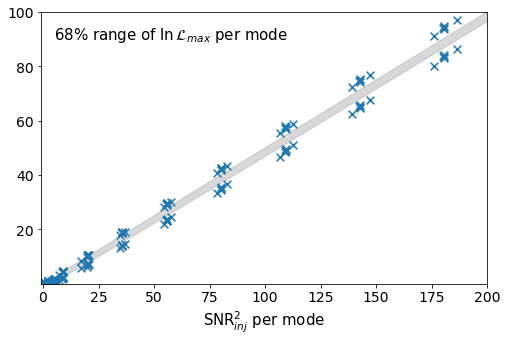

In [4]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0,22,200)
plt.fill_between(x_new**2,logi0(x_new**2)-x_new**2/2,x_new**2/2,alpha=0.3,color='gray')
plt.scatter(datanew["SNR"]**2/6,datanew["log_likelihood_new_error_up"]/6,color='C0',marker='x',s=60)
plt.scatter(datanew["SNR"]**2/6,datanew["log_likelihood_new_error_down"]/6,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    lnLup = np.percentile(data["maxloglikelihood"]/Nmode,84)
    lnLdown = np.percentile(data["maxloglikelihood"]/Nmode,16)
    SNRnm = np.mean(data["SNR_comb_signal"]**2/Nmode)
    # plt.scatter(SNRnm,lnLup,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,lnLdown,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,lnLup,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,lnLdown,color='C0',marker='x',s=60)    
    plt.xlabel('SNR$_{inj}^2$ per mode',fontsize = 15)  
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    lnLup = np.percentile(data["maxloglikelihood"]/Nmode,84)
    lnLdown = np.percentile(data["maxloglikelihood"]/Nmode,16)
    SNRnm = np.mean(data["SNR_comb_signal"]**2/Nmode)
    # plt.scatter(SNRnm,lnLup,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,lnLdown,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,lnLup,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,lnLdown,color='C0',marker='x',s=60)    
    plt.xlabel('SNR$_{inj}^2$ per mode',fontsize = 15)  
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    
plt.text(5,90,'68% range of $\ln\mathcal{L}_{max}$ per mode',fontsize = 15)    
plt.xlim(-1,200)
plt.ylim(0.02,100)
plt.savefig('SNR2LogL.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

/tmp/ipykernel_3572574/1274179600.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.fill_between(x_new,1+1/x_new**1,1-1/x_new**1,alpha=0.2,color='gray')


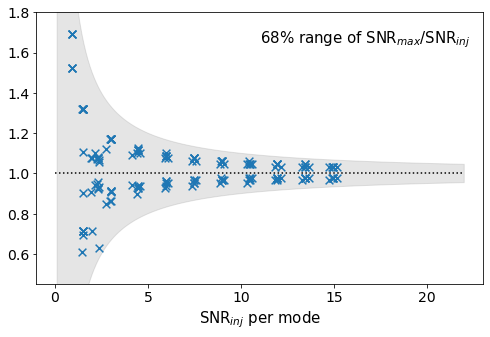

In [5]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0,22,200)
plt.plot(x_new,x_new**0,':',color='black')
plt.fill_between(x_new,1+1/x_new**1,1-1/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2/6),datanew['echoamplitude_searched_new_error_up']/datanew['echoamplitude_injected'],color='C0',marker='x',s=60)
plt.scatter(np.sqrt(datanew["SNR"]**2/6),datanew['echoamplitude_searched_new_error_down']/datanew['echoamplitude_injected'],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    SNRnsm = np.mean(data["SNR_comb_global"]/np.sqrt(Nmode))
    SNRnsup = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),84)
    SNRnsdown = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),16)
    SNRnm = np.mean(data["SNR_comb_signal"]/np.sqrt(Nmode))
    # plt.scatter(SNRnm,SNRnsup/SNRnm,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsup/SNRnm,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    SNRnsm = np.mean(data["SNR_comb_global"]/np.sqrt(Nmode))
    SNRnsup = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),84)
    SNRnsdown = np.percentile(data["SNR_comb_global"]/np.sqrt(Nmode),16)
    SNRnm = np.mean(data["SNR_comb_signal"]/np.sqrt(Nmode))
    # plt.scatter(SNRnm,SNRnsup/SNRnm,color='C1',marker='x',s=60)
    # plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C1',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsup/SNRnm,color='C0',marker='x',s=60)
    plt.scatter(SNRnm,SNRnsdown/SNRnm,color='C0',marker='x',s=60)
    
plt.xlabel('SNR$_{inj}$ per mode',fontsize = 15)
plt.text(11,1.65,'68% range of SNR$_{max}$/SNR$_{inj}$',fontsize = 15)    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0.45,1.8)
plt.xlim(-1,23)
plt.savefig('SNRSNRsearch.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

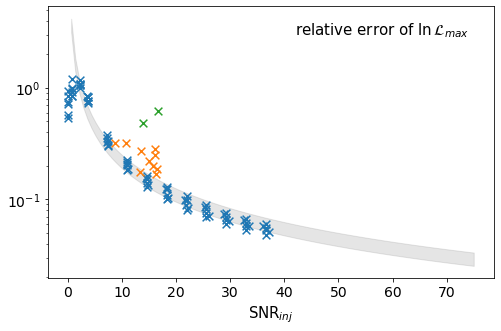

In [6]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0.6,75,100)
plt.fill_between(x_new,1.9/x_new**1, 2.5/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2),datanew["log_likelihood_new_error"]/datanew["log_likelihood_new"],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    lnLm = np.mean(data["maxloglikelihood"])
    lnLerror = error(data["maxloglikelihood"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,lnLerror/lnLm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,lnLerror/lnLm,color='C1',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    lnLm = np.mean(data["maxloglikelihood"])
    lnLerror = error(data["maxloglikelihood"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,lnLerror/lnLm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,lnLerror/lnLm,color='C2',marker='x',s=60)
plt.xlabel('SNR$_{inj}$',fontsize = 15)
plt.yscale('log')
plt.text(42,3,'relative error of $\ln\mathcal{L}_{max}$',fontsize = 15)    
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('SNRLogLerror.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()

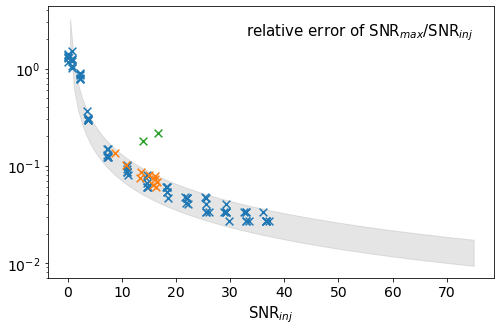

In [7]:
plt.figure(figsize=(8,5))
x_new = np.linspace(0.4,75,100)
plt.fill_between(x_new,0.7/x_new**1,1.3/x_new**1,alpha=0.2,color='gray')
plt.scatter(np.sqrt(datanew["SNR"]**2),datanew['echoamplitude_searched_new_error']/datanew['echoamplitude_searched_new'],color='C0',marker='x',s=60)
for index in np.arange(0,len(file_index)):
    file = file_index[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/5.83
    SNRsm = np.mean(data["SNR_comb_global"])
    SNRnserror = error(data["SNR_comb_global"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,SNRnserror/SNRm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,SNRnserror/SNRm,color='C1',marker='x',s=60)
for index in np.arange(0,len(file_index_q)):
    file = file_index_q[index]
    data = pd.read_csv(file)
    Nmode = (data["fmax_median"]-data["fmin_median"])/spacing_q_index[index]
    SNRsm = np.mean(data["SNR_comb_global"])
    SNRnserror = error(data["SNR_comb_global"])
    SNRm = np.mean(data["SNR_comb_signal"])
    # plt.scatter(SNRm,SNRnserror/SNRm,color='C1',marker='x',s=60)
    plt.scatter(SNRm,SNRnserror/SNRm,color='C2',marker='x',s=60)
    
plt.xlabel('SNR$_{inj}$',fontsize = 15)
plt.yscale('log')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.text(33,2.2,'relative error of SNR$_{max}$/SNR$_{inj}$',fontsize = 15)    
plt.savefig('SNRSNRsearcherror.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
plt.close()